In [1]:
# Import packages, load and preview data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('superstoredata.csv', parse_dates=['InvoiceDate'])
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [2]:
# Check data information
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Sales        541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB
None
(541909, 9)


In [3]:
# Check for missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Sales               0
dtype: int64

In [4]:
# Check data statistics
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Sales
count,541909.000000,541909,541909.000000,406829.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,9.750000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,218.081158,NaN,96.759853,1713.600303,378.810824


After chaining .sum() to pandas dataframe method .isna(), it was seen that the data had null values, with Customer Id being the column with the highest number of missing values; 135080 missing values. The Description column also had missing values; 1454 missing values. 
Pandas .describe() was then used and abnormal negative values were discovered. The Quantity, Unit Price, and Sales columns had negative values which is not normal as quantities sold cannot be negative and neither can unit price of items and sales values.

### DATA CLEANING

In [5]:
# Drop missing values in CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Transform negative values in Quantity and Sales to positive
df['Quantity'] = df['Quantity'].abs()
df['Sales'] = df['Sales'].abs()
print(df.isna().sum())
print(df.describe())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Sales          0
dtype: int64
            Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mean       13.412279  2011-07-10 16:30:57.879207424       3.460471   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       248.624170                            NaN      69.315162   

          CustomerID          Sales  
count  406829.000000  406829.000000  
mean    15287.690570      23.407255  
min     12346.000000       0.000000  
25%     13953.000000       4.680000  
50%     15152

In [6]:
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Sales  


The missing values in the Customer ID column were dropped.
There were negative values in the Sales, and Quantity columns as mentioned earlier and they were transformed to positive values.
The Sales and Unit Price column had 0 as the minimum for a product and there's no way the store would be giving products out for free when they were ordered. This only means it is an error that needs to be dealt with. 

In [7]:
# Remove zero sales
df = df[df['Sales'] != 0]

# Change CustomerID data type to integer
df['CustomerID'] = df['CustomerID'].astype(int)

print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  406789.000000                         406789  406789.000000   
mean       13.379467  2011-07-10 16:28:44.845459968       3.460811   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:46:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       247.858601                            NaN      69.318561   

          CustomerID          Sales  
count  406789.000000  406789.000000  
mean    15287.795830      23.409556  
min     12346.000000       0.001000  
25%     13954.000000       4.680000  
50%     15152.000000      11.800000  
75%     16791.000000      19.800000  
max     18287.000000  168469.600000  
std      1713.573064     427.458681  


Rows where the Unit Price and Sales values were 0 were removed by subsetting. The data type of the CustomerID column was changed to integer.

In [8]:

# Check for duplicates
print(df.duplicated().sum())


5225


In [9]:
# Preview the duplicates
duplicates = df[df.duplicated()].sort_values(by='Description')
print(duplicates.head(10))

       InvoiceNo StockCode                     Description  Quantity  \
160509    550459    72800B   4 PURPLE FLOCK DINNER CANDLES         1   
483414    577503    72800B   4 PURPLE FLOCK DINNER CANDLES         1   
460098    575895     23345               DOLLY GIRL BEAKER         1   
503199    578921     23345               DOLLY GIRL BEAKER         1   
531669    580958     23345               DOLLY GIRL BEAKER         2   
379874    569714     23391     I LOVE LONDON MINI BACKPACK         1   
526434    580667     23472         NINE DRAWER OFFICE TIDY         1   
453518    575482     22167      OVAL WALL MIRROR DIAMANTE          1   
523049    580501     23438         RED SPOT GIFT BAG LARGE         2   
495842    578326     23438         RED SPOT GIFT BAG LARGE        12   

               InvoiceDate  UnitPrice  CustomerID         Country  Sales  
160509 2011-04-18 13:17:00       2.55       18116  United Kingdom   2.55  
483414 2011-11-20 12:34:00       2.55       18110  United

In [10]:
# Drop duplicates
df.drop_duplicates(inplace=True)
duplicates = df[df.duplicated()]
print(duplicates)
print(df.shape)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Sales]
Index: []
(401564, 9)


After chaining .sum() to pandas "duplicated()" method, we previewed the number of duplicated values which amounted to 5225. The duplicates were eventually dropped using pandas "drop_duplicates" method.

### GEOGRAPHICAL ANALYSIS

In [11]:
# Print the total revenue across the 13 months
print('Total revenue is ' + f'{df['Sales'].sum().round(2)}' + ' pounds')

Total revenue is 9495898.36 pounds


In [12]:
# Set thene for all plots and create a bar plot function
sns.set_theme(context='notebook', style= "darkgrid",)
def grouped_bar_plot(data, xlabel, ylabel, title):
    """
    Creates a bar plot for grouped data.

    Args:
        data (pd.Series): The data to plot.
        title (str): The title of the plot.

    Returns:
        A bar plot.
    """
    
    _ = data.plot(x='Country', kind='barh',\
                figsize=(10, 8),\
                color=['#C1A5A9', '#694873'])
    _ = plt.xlabel(xlabel, fontsize=15)
    _ = plt.ylabel(ylabel, fontsize=15)
    _ = plt.title(title, fontsize=17)
    _ = plt.gca().invert_yaxis()

    return plt.show()

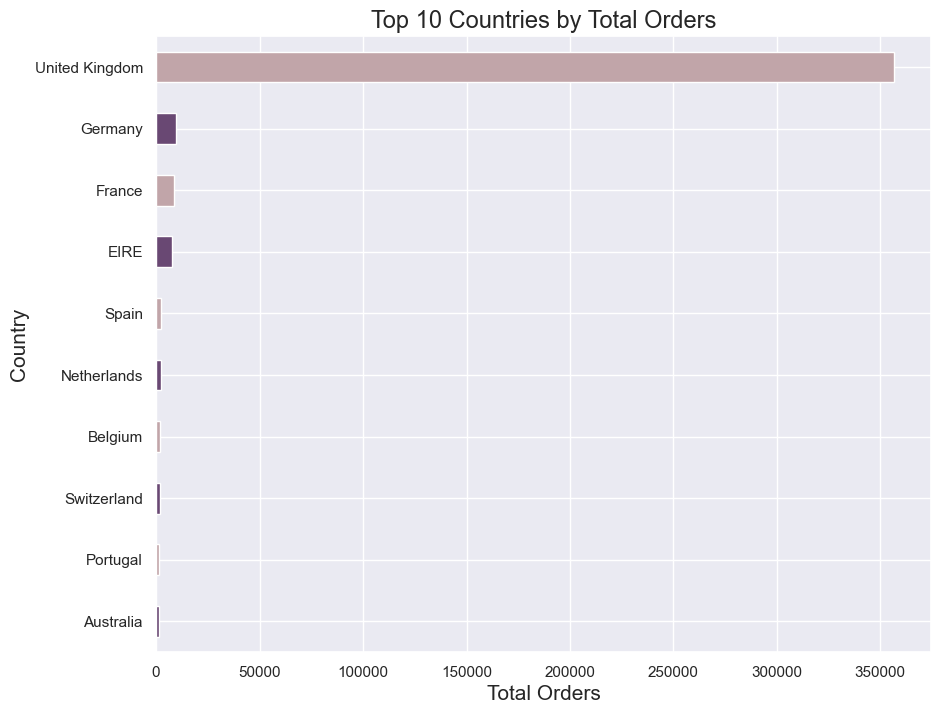

In [13]:
# Create a pandas series and display a barplot of it
grouped = df.groupby('Country')
top_country_by_order = grouped.size().nlargest(10)
grouped_bar_plot(top_country_by_order,\
            title='Top 10 Countries by Total Orders',\
            xlabel='Total Orders', ylabel='Country')

In [14]:
# Define a function that returns a pie chart
def pie_chart(data, title):
    """Display a pie chart

    Args:
        data(var): Must be a pandas series.
        title(str): Plot title. Must be a string.

    Returns:
        A pie chart
    """
    
    plt.figure(figsize=(15, 10))
    plt.pie(data, labels=data.index, labeldistance=1.05,\
                autopct='%1.1f%%', startangle=140)
    plt.title(title, fontsize=30)
    plt.axis('equal')
    return plt.show()

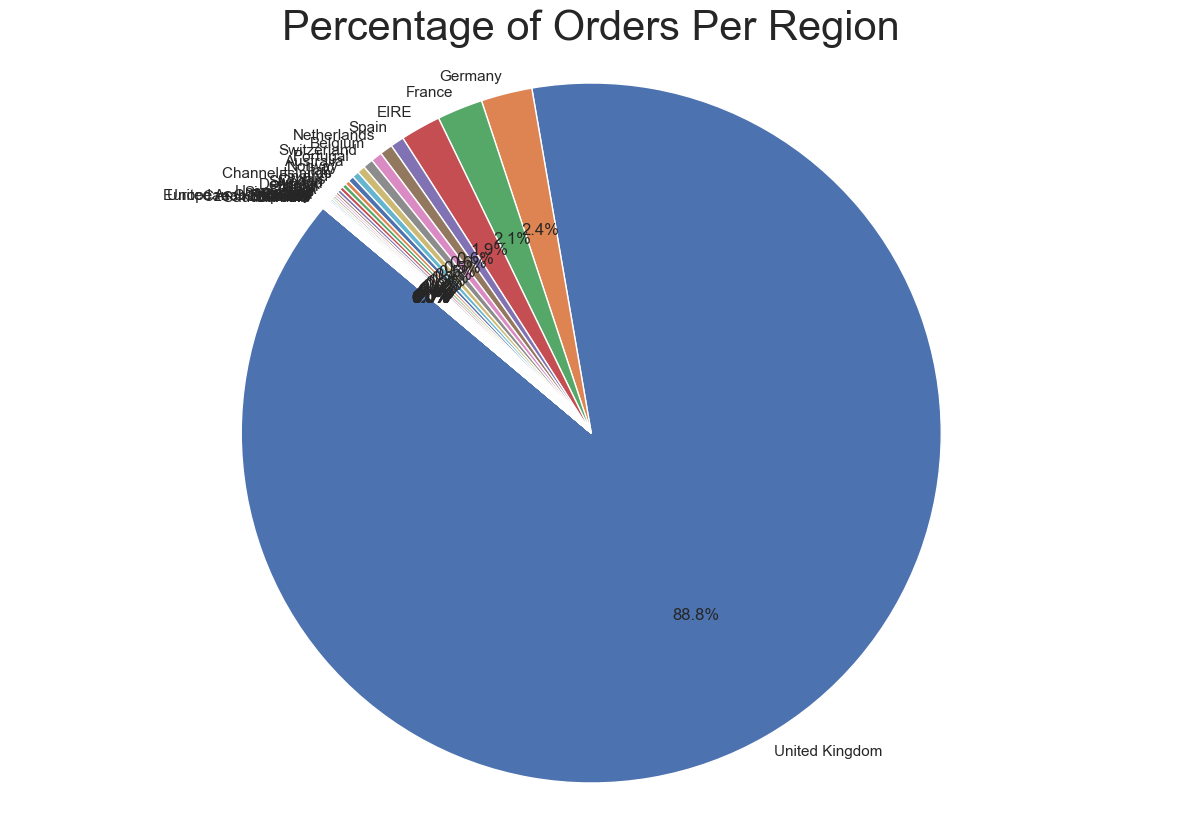

In [15]:
# Visualise the percentage of each region with a pie chart
countries = df['Country'].value_counts()
pie_chart(countries, 'Percentage of Orders Per Region')

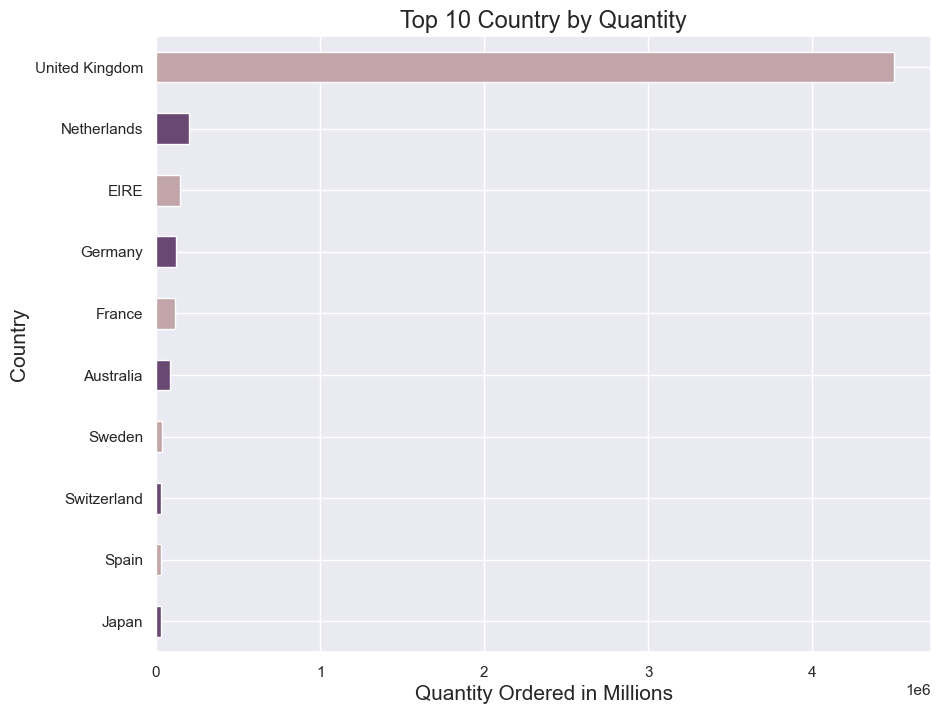

In [16]:
# Display countries with the most quatity of products ordered
top_country_by_quantity = grouped['Quantity'].sum().nlargest(10)
grouped_bar_plot(top_country_by_quantity,\
            title='Top 10 Country by Quantity',\
            xlabel='Quantity Ordered in Millions',\
            ylabel='Country')

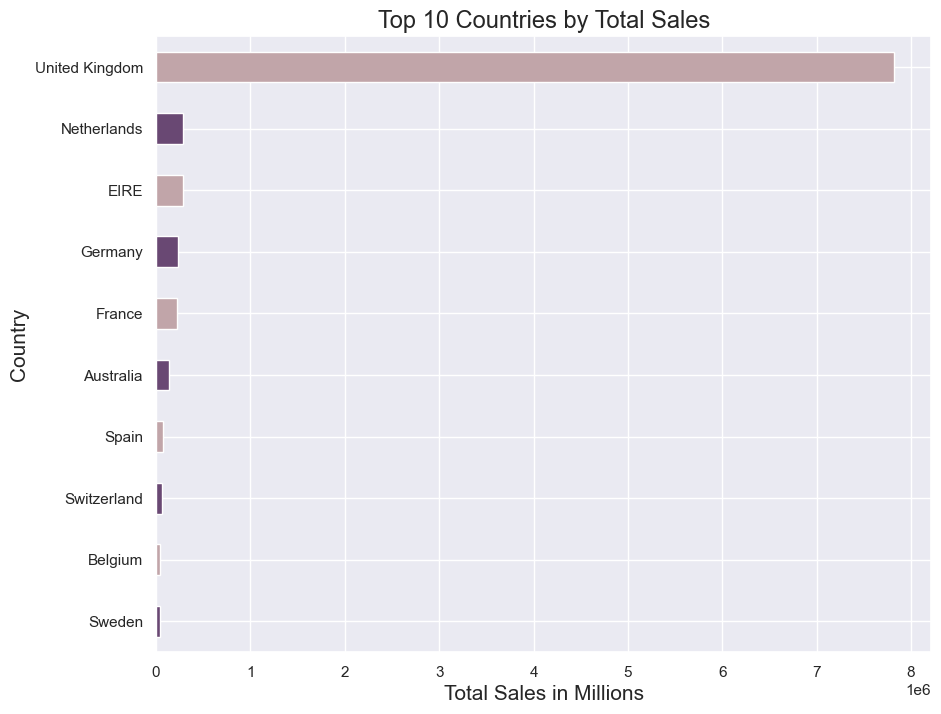

In [17]:
# Display top countries with the highest sales
top_country_by_sales = grouped['Sales'].sum().nlargest(10)
grouped_bar_plot(top_country_by_sales,\
            title='Top 10 Countries by Total Sales',\
            xlabel='Total Sales in Millions',\
            ylabel='Country')

In [18]:
# Define a plot function that returns a bar plot
def bar_plot(data, x, y, xlabel, ylabel, title, hue):
    """
    Creates a bar plot.

    Args:
        data (pd.Series): The data to plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        title (str): The title of the plot.

    Returns:
        A bar plot.
    """


    fig, ax=plt.subplots(figsize=(10, 8))
    _=sns.barplot(x=x, y=y, data=data, hue=hue)
    _=plt.xlabel(xlabel, fontsize=15)
    _=plt.xticks(rotation=90)
    _=plt.ylabel(ylabel, fontsize=15)
    _=plt.title(title, fontsize=17)

    return plt.show()

### CUSTOMER ANALYSIS

In [19]:
# Check the number of unique customers present in the dataset
cust_num = df['CustomerID'].nunique()
print('The total number of customers is', cust_num)

The total number of customers is 4371


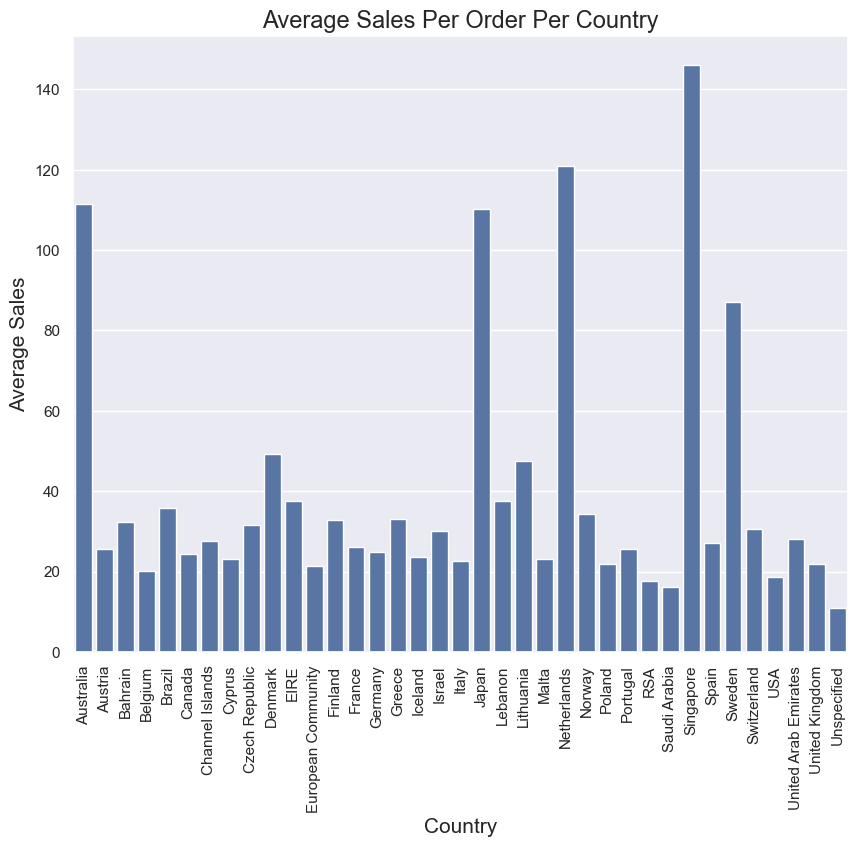

In [20]:
# Visualise the average sales per order in each country
avg_sales_country = grouped['Sales'].mean()
bar_plot(data=None, x=avg_sales_country.index,\
            y=avg_sales_country, xlabel = 'Country',\
            ylabel='Average Sales',\
            title = 'Average Sales Per Order Per Country',\
            hue = None)

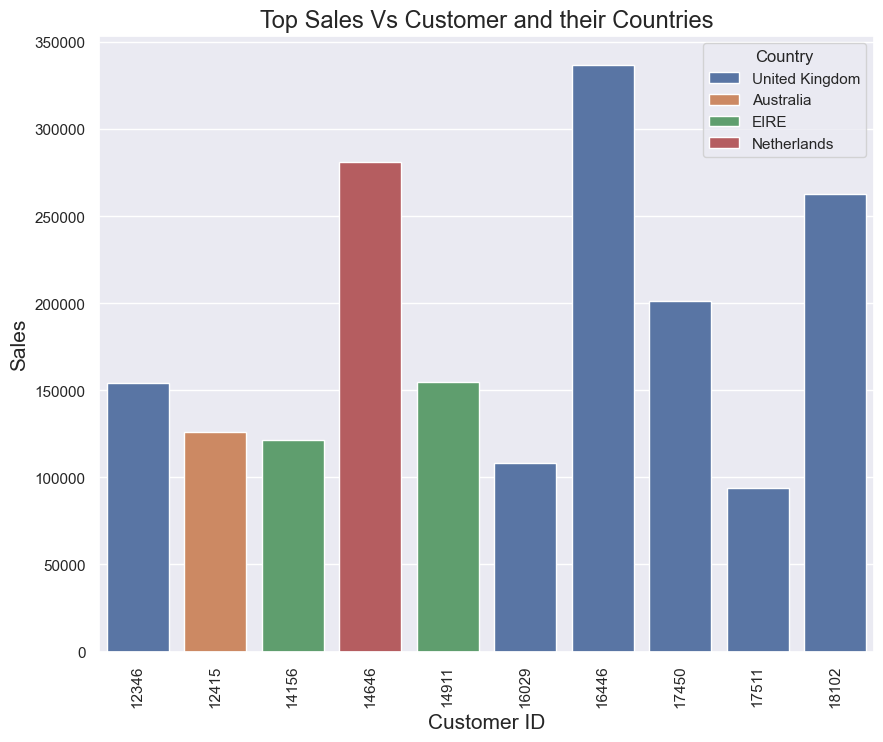

In [21]:
# Visualise the top 20 customers by revenue and their country
customers = df.groupby(['CustomerID', 'Country'], as_index=False)
customers_rev = customers['Sales'].sum().nlargest(10, columns='Sales')
bar_plot(data=customers_rev, x='CustomerID', y='Sales',\
            xlabel='Customer ID', ylabel='Sales',\
            hue='Country',\
            title='Top Sales Vs Customer and their Countries')

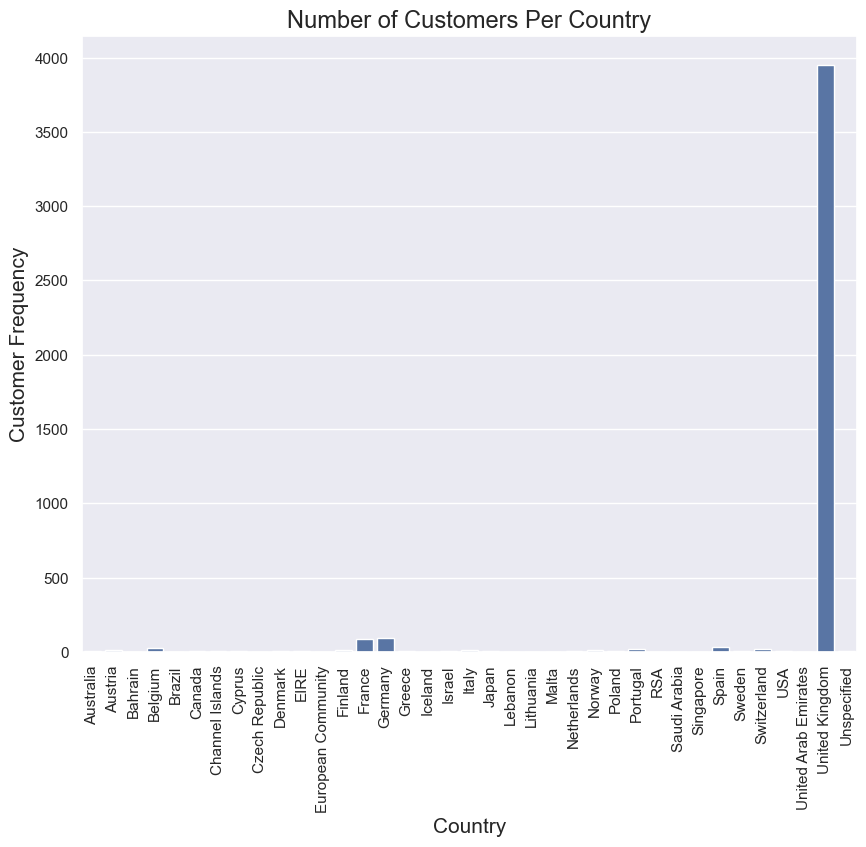

In [22]:
# Visualise the number of customers per country
cust_id_per_reg= df.groupby('Country')['CustomerID'].nunique()
bar_plot(data=None, x=cust_id_per_reg.index,\
            y=cust_id_per_reg, xlabel='Country',\
            ylabel='Customer Frequency',\
            title='Number of Customers Per Country',\
            hue=None)

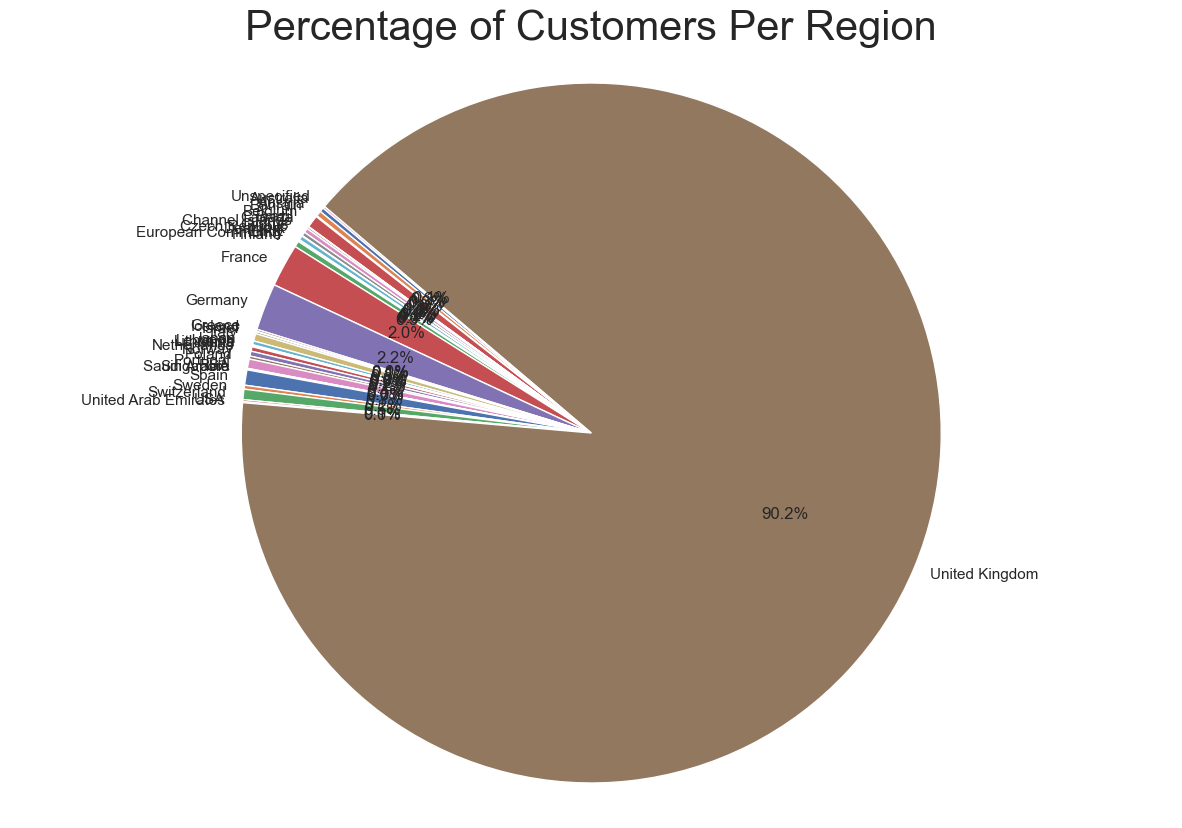

In [23]:
# Plot the percentage of customers per region
pie_chart(cust_id_per_reg, 'Percentage of Customers Per Region')

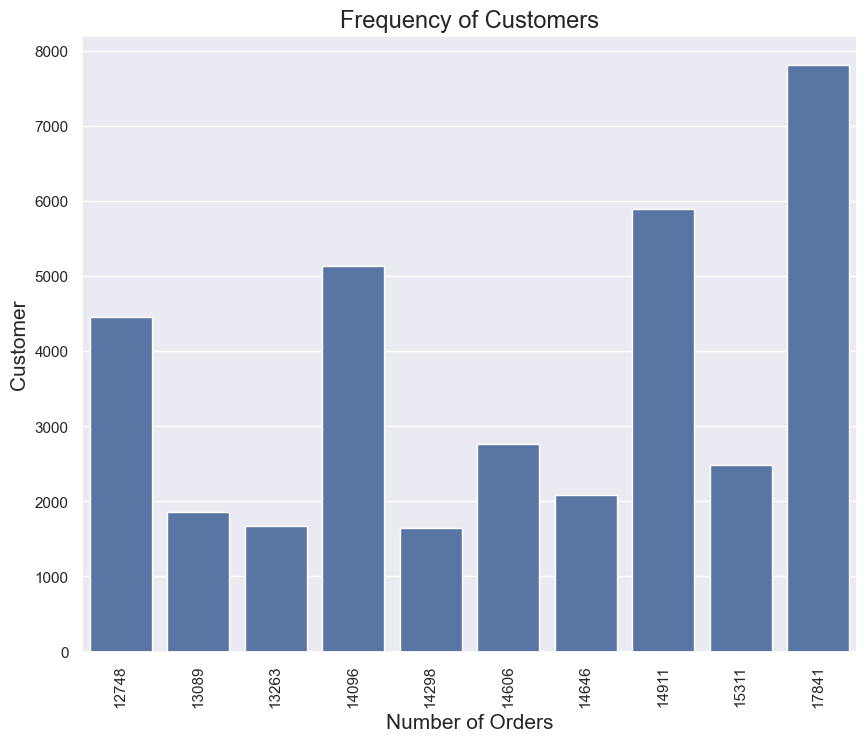

In [24]:
# Visualise the frequency of customers
freq_cust = df['CustomerID'].value_counts().nlargest(10)
bar_plot(data=None, x=freq_cust.index, y=freq_cust,\
            title='Frequency of Customers', hue=None,\
            xlabel='Number of Orders', ylabel='Customer')

### PRODUCT ANALYSIS

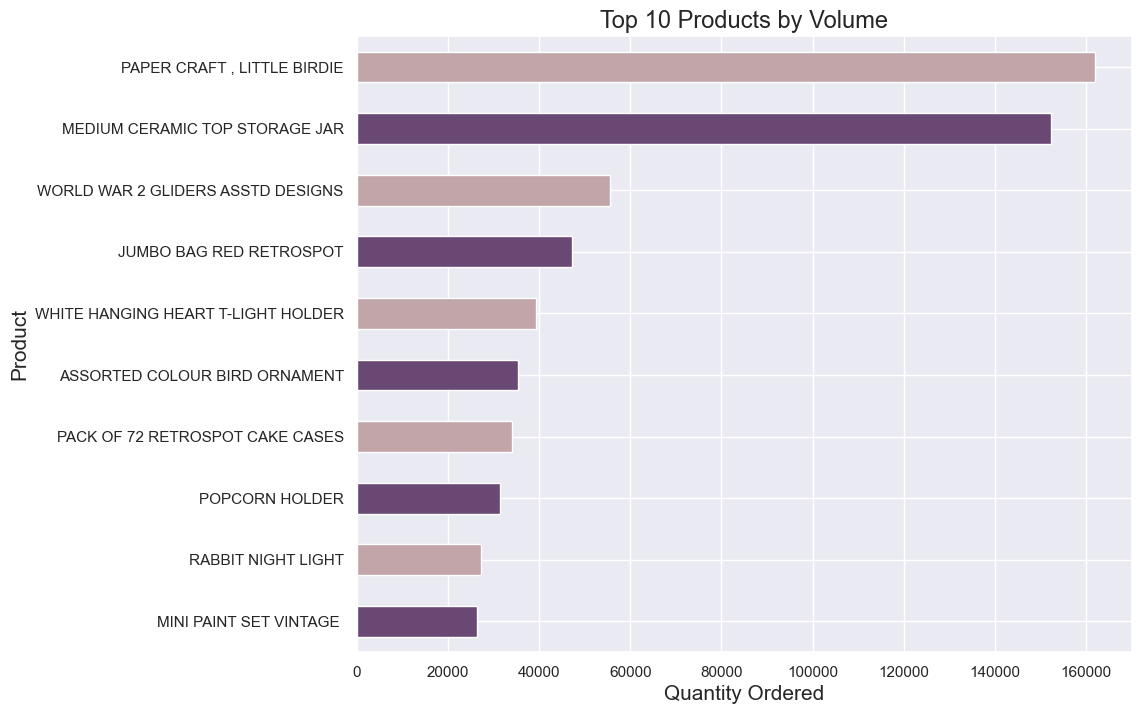

In [25]:
# Display the top products by volume
prod = df.groupby('Description')
top_prod_vol = prod['Quantity'].sum().nlargest(10)
grouped_bar_plot(top_prod_vol,\
            title='Top 10 Products by Volume',\
            xlabel='Quantity Ordered', ylabel='Product')

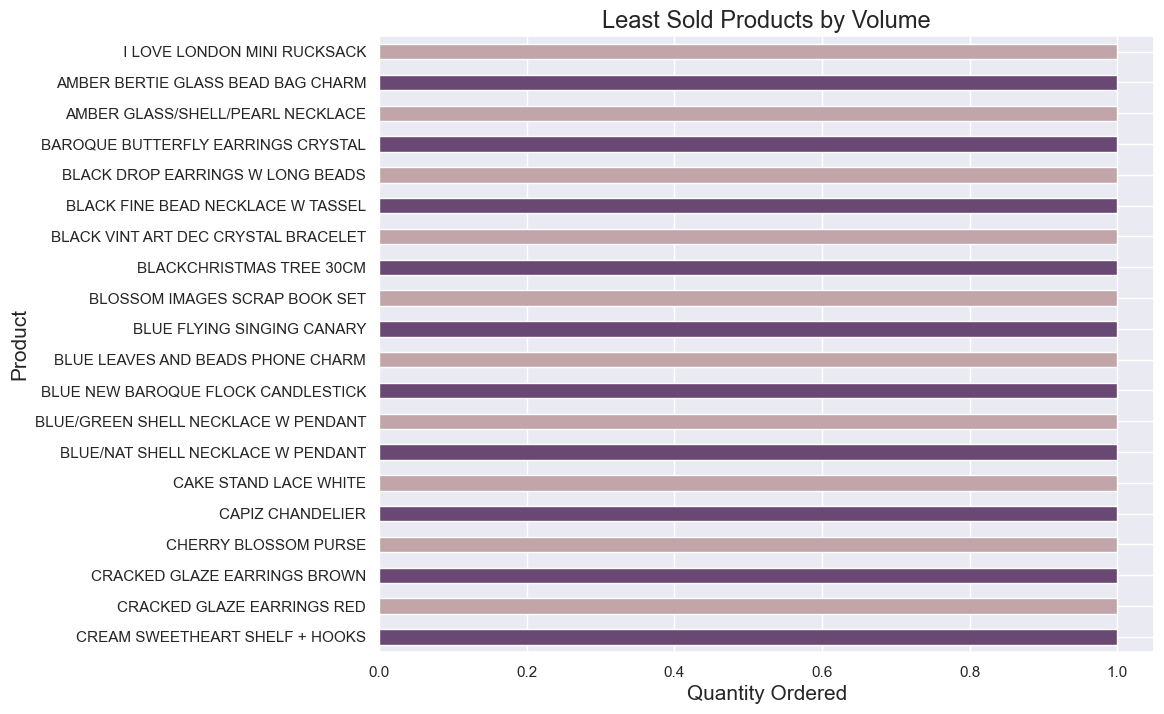

In [26]:
# Visualise the least sold products by volume
least_prod_vol = prod['Quantity'].sum().nsmallest(20)
grouped_bar_plot(least_prod_vol,\
            title='Least Sold Products by Volume',\
            xlabel='Quantity Ordered', ylabel='Product')

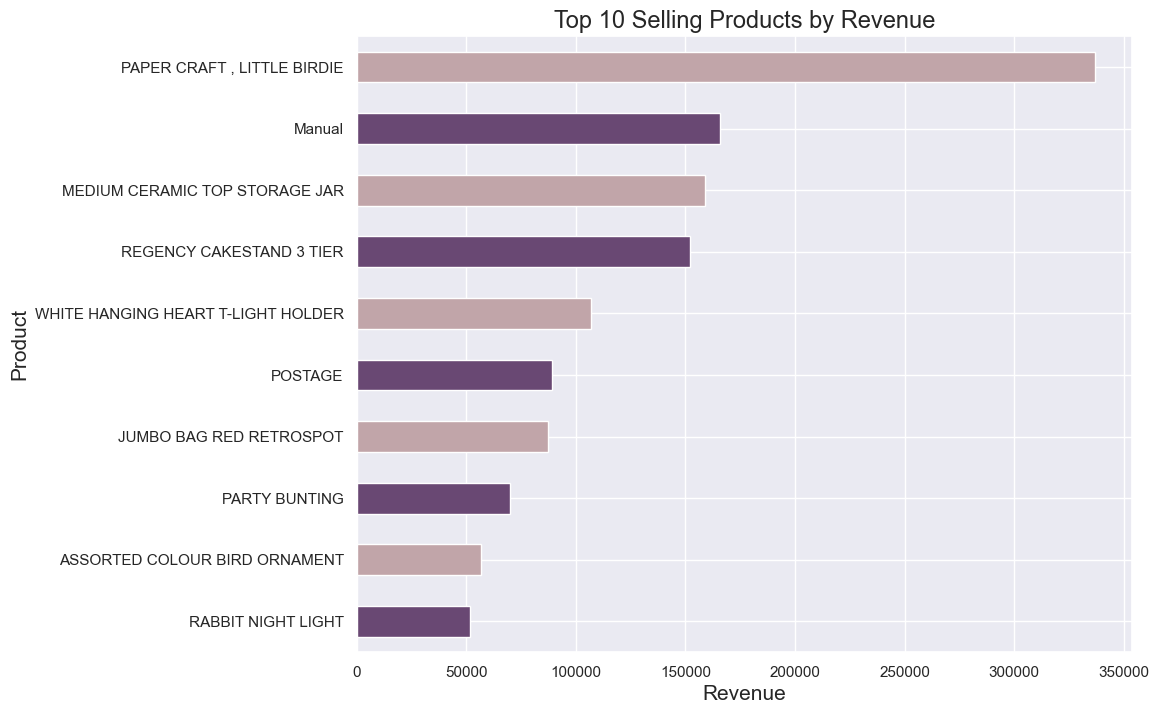

In [27]:
# Identify the top selling products by revenue
top_prod_rev = prod['Sales'].sum().nlargest(10)
grouped_bar_plot(top_prod_rev,\
            title='Top 10 Selling Products by Revenue',\
            xlabel='Revenue', ylabel='Product')

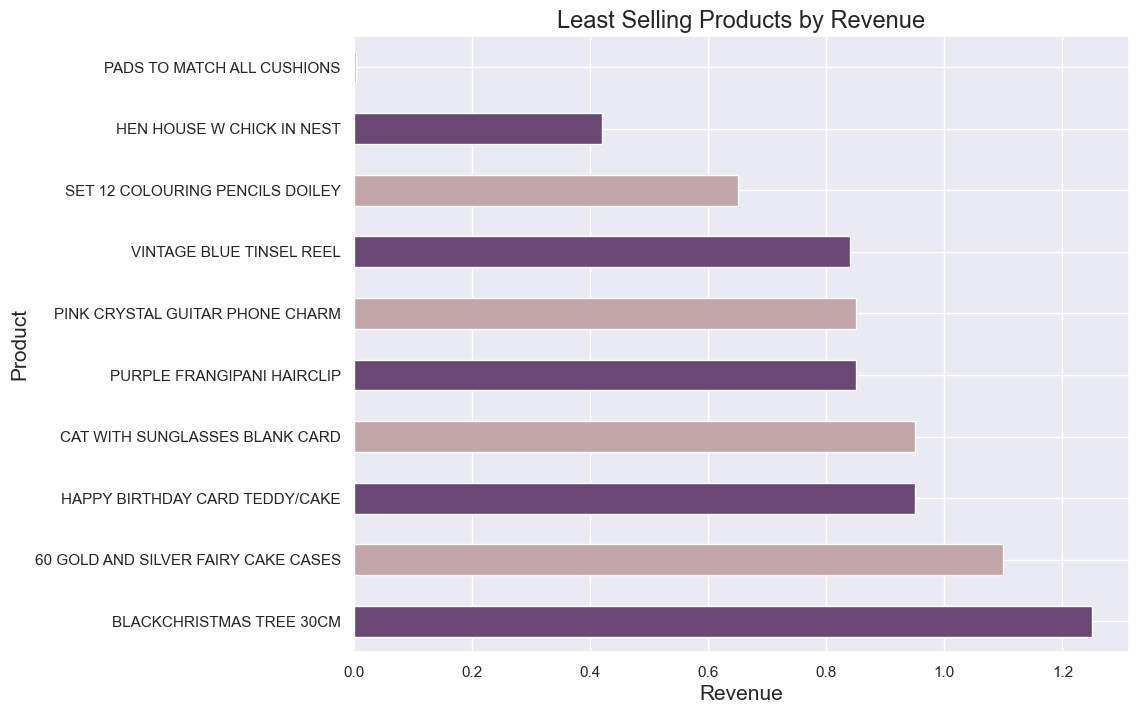

In [28]:
# Identify the least selling products by revenue
least_prod_rev = prod['Sales'].sum().nsmallest(10)
grouped_bar_plot(least_prod_rev,\
            title='Least Selling Products by Revenue',\
            xlabel='Revenue', ylabel='Product')

### TIME SERIES ANALYSIS

In [29]:
# Set the index of df to InvoiceDate
df.set_index('InvoiceDate', inplace=True)


In [30]:
# Engineer Day of the week as Day, Month name as Month, and Time of the day as Hour from InvoiceDate
df['Day'] = df.index.day_name()
df['Month'] = df.index.month_name()
df['Hour'] = df.index.strftime('%I %p')
print(df.tail())

                    InvoiceNo StockCode                      Description  \
InvoiceDate                                                                
2011-12-09 12:50:00    581587     22613      PACK OF 20 SPACEBOY NAPKINS   
2011-12-09 12:50:00    581587     22899     CHILDREN'S APRON DOLLY GIRL    
2011-12-09 12:50:00    581587     23254    CHILDRENS CUTLERY DOLLY GIRL    
2011-12-09 12:50:00    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE   
2011-12-09 12:50:00    581587     22138    BAKING SET 9 PIECE RETROSPOT    

                     Quantity  UnitPrice  CustomerID Country  Sales     Day  \
InvoiceDate                                                                   
2011-12-09 12:50:00        12       0.85       12680  France  10.20  Friday   
2011-12-09 12:50:00         6       2.10       12680  France  12.60  Friday   
2011-12-09 12:50:00         4       4.15       12680  France  16.60  Friday   
2011-12-09 12:50:00         4       4.15       12680  France  16.60  Fri

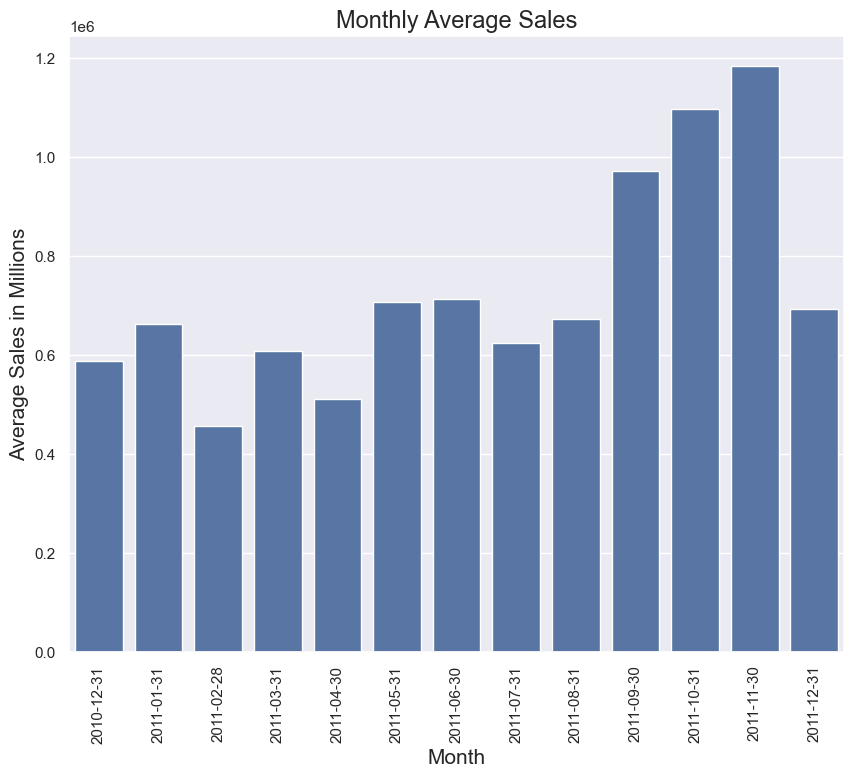

In [31]:
# Create average monthly sales
monthly = df['Sales'].resample('ME').sum()

# Visualise data in a bar plot
bar_plot(data=None, x=monthly.index, y=monthly,\
            xlabel='Month', ylabel='Average Sales in Millions',\
            title='Monthly Average Sales', hue=None)


In [32]:
# Define time distribution function
def time_count(data, x, xlabel, title, rot=0):
    """
    Creates a time distribution plot.

    Args:
        data (pd.DataFrame): The data to plot.
        x (str): The column to use for the x-axis.
        xlabel (str): The label for the x-axis.
        rot (int): The rotation for the x-axis labels.

    Returns:
        A countplot of the data.
    """

    plt.figure(figsize=(10, 8))
    _ = sns.countplot(x=x, data=data)
    _ = plt.xlabel(xlabel, fontsize=13)
    _ = plt.ylabel('Number of Orders')
    _ = plt.title(title, fontsize=17)
    _ = plt.xticks(rotation=rot)

    return plt.show()



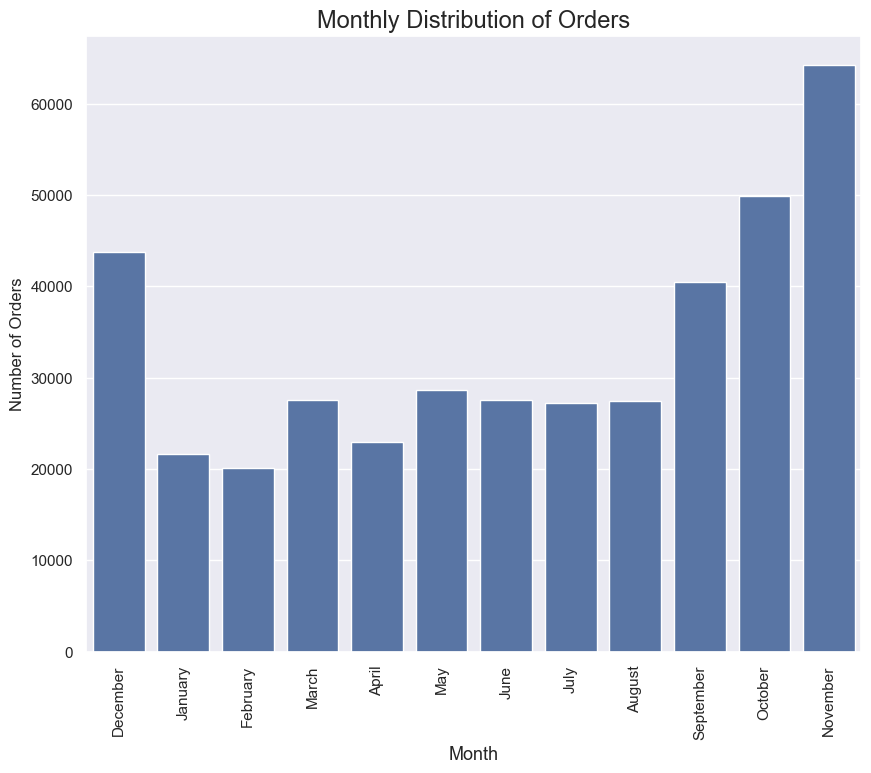

In [33]:
# Monthly distribution of orders
time_count(data=df, x='Month', xlabel='Month',\
            title='Monthly Distribution of Orders', rot=90)

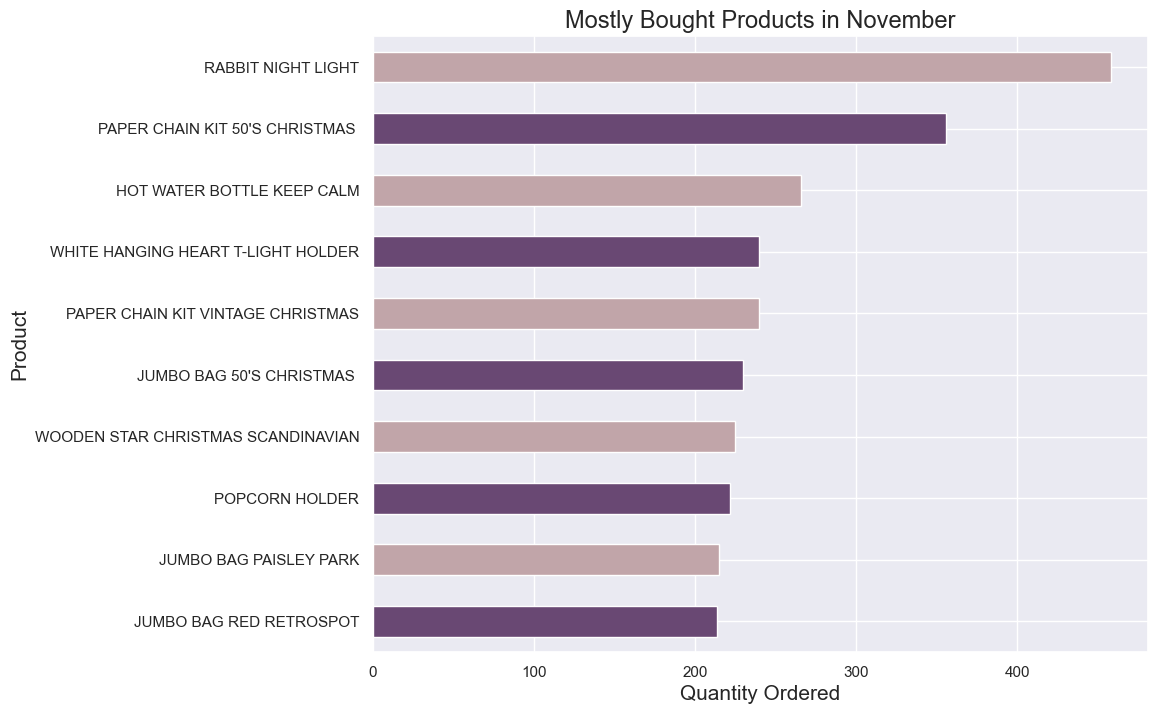

In [34]:
# Mostly bought item in November
nov_prod = df[df['Month']=='November']['Description'].value_counts().nlargest(10)
nov_prod
grouped_bar_plot(nov_prod,\
            title='Mostly Bought Products in November',\
            xlabel='Quantity Ordered', ylabel='Product')

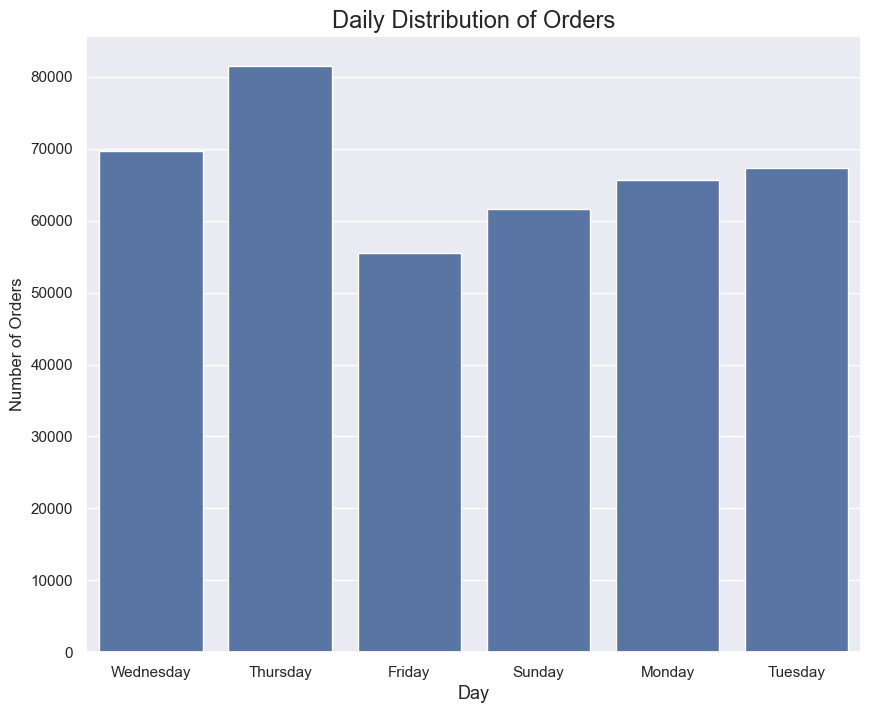

In [35]:
# Daily distribution
time_count(data=df, x='Day', xlabel='Day',\
            title='Daily Distribution of Orders')

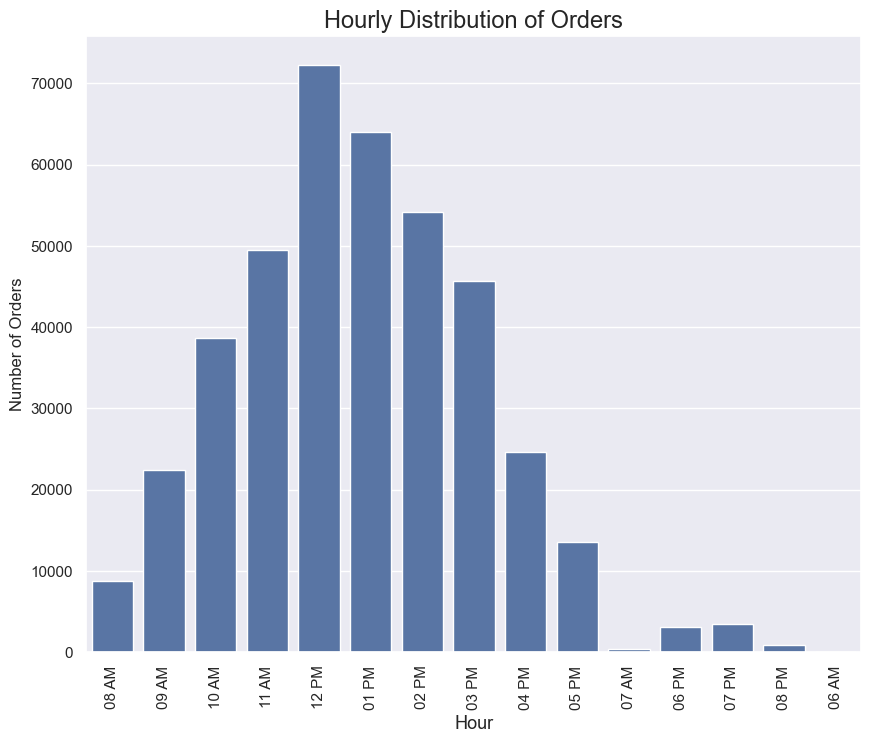

In [36]:
#  Display Hourly distribution to show busiest hours
time_count(data=df, x='Hour', xlabel='Hour',\
            title='Hourly Distribution of Orders', rot=90)

### Sales Trend

In [37]:
# Create a time series trend plt function
def time_series_plot(data, xlabel, ylabel, title):
    """
    Creates a time series plot.

    Args:
        data (pd.Series): The data to plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        title (str): The title of the plot.

    Returns:
        A line plot.
    """    

    plt.figure(figsize=(12, 6))
    _ = sns.lineplot(data) 
    _ = plt.xlabel(xlabel, fontsize=13)
    _ = plt.ylabel(ylabel, fontsize=13)
    _ = plt.title(title, fontsize=17)

    return plt.show()

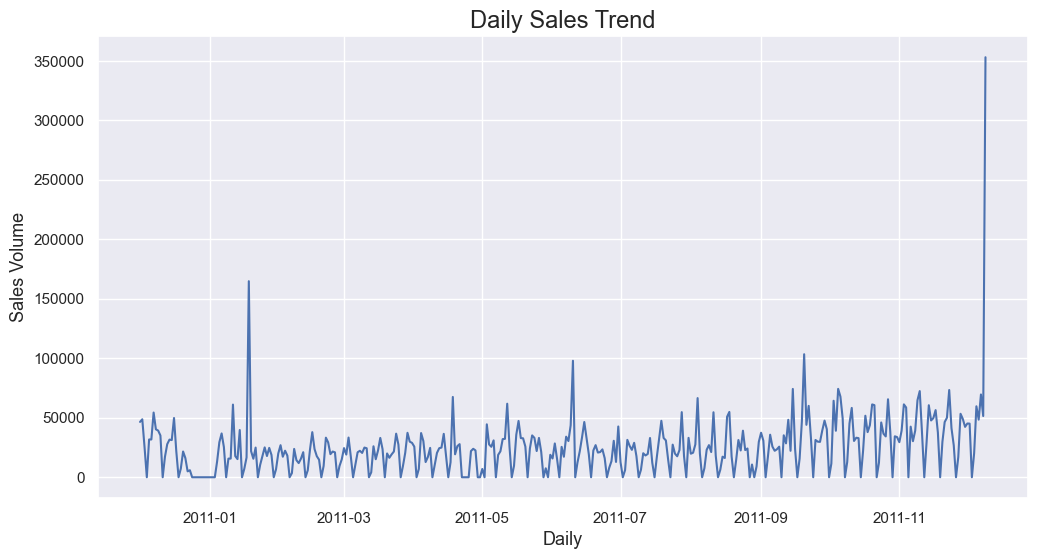

In [38]:
# Show Daily sales trend with lineplot
daily_sales = df['Sales'].resample('D').sum()
time_series_plot(daily_sales, title='Daily Sales Trend',\
            ylabel='Sales Volume', xlabel='Daily')

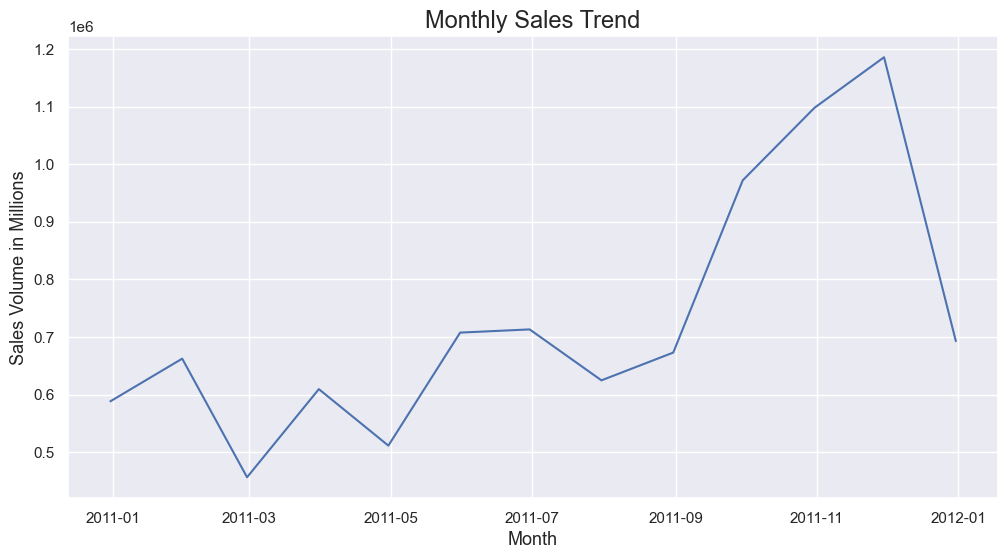

In [39]:
# Show Monthly sales trend with lineplot
monthly_sales = df['Sales'].resample('ME').sum()
time_series_plot(monthly_sales, xlabel='Month',\
            ylabel='Sales Volume in Millions',\
            title='Monthly Sales Trend')

In [40]:
# Create a Pearson correlation table
df_correlation = df.corr(numeric_only=True)
print(df_correlation)

            Quantity  UnitPrice  CustomerID     Sales
Quantity    1.000000  -0.001338   -0.004822  0.918959
UnitPrice  -0.001338   1.000000   -0.004527  0.165644
CustomerID -0.004822  -0.004527    1.000000 -0.002982
Sales       0.918959   0.165644   -0.002982  1.000000


In [41]:
# Create correlation heatmap
def corr_heatmap(data):
    """
    Creates a correlation heatmap.

    Args:
        data (pd.DataFrame): The data to plot.

    Returns:
        A heatmap of the data.
    """
    
    plt.figure(figsize=(12, 9))
    _ = sns.heatmap(data=data, annot=True)
    _ = plt.title('Sales Data Correlation Heatmap', fontsize=17)

    return plt.show()

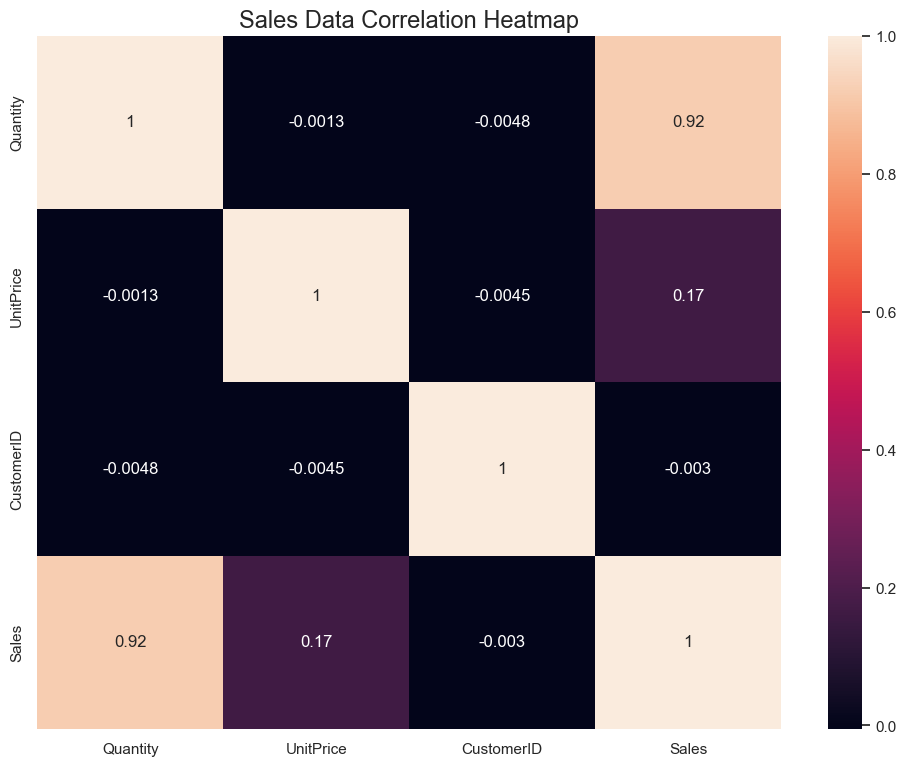

In [42]:
corr_heatmap(df_correlation)

From the above correlation table after using Pearson correlation coefficient, Quantity and Sales have a correlation of 0.92. This pair are the only ones with a strong correlation. The correlation is also positive. This means that as the quantity of  products sold increases, revenue from sales also increases which is natural.